In [1]:
# Import needed libraries
import pandas as pd

In [2]:
# Create our dataframe
df = pd.read_csv("AAPL.csv")

In [3]:
# View first 5 entries
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-22,28.587500,28.735001,28.500000,28.655001,26.873819,124296000
1,2016-09-23,28.605000,28.697500,27.887501,28.177500,26.426001,209924800
2,2016-09-26,27.910000,28.347500,27.887501,28.219999,26.465858,119477600
3,2016-09-27,28.250000,28.295000,28.084999,28.272499,26.515097,98429600
4,2016-09-28,28.422501,28.660000,28.357500,28.487499,26.716732,118564400


In [4]:
# Create a new dataframe; Index out the "Close" column 
new_df = df[["Close"]]

In [5]:
# View the new dataframe
new_df.head()

,Close
0,28.655001
1,28.177500
2,28.219999
3,28.272499
4,28.487499


In [19]:
# Obtain numpy array from dataframe. Reshape to a 1D array
data = new_df.values
data = data.reshape(-1)

## Creating our Dataset

### Define Window size & Total Size

In [22]:
# Define TOTAL_SIZE & WINDOW_SIZE
WINDOW_SIZE = 60
TOTAL_SIZE = len(data)

In [24]:
TOTAL_SIZE - WINDOW_SIZE

1198

In [27]:
# Sample
sample_x = []
sample_y = []
sample_arr = [1,2,3,4,5,6,7,8]
sample_window_size = 3
sample_iter_no = 1

for i in range(len(sample_arr) - sample_window_size):
  sample_x.append(sample_arr[i: i+sample_window_size])
  sample_y.append(sample_arr[i+sample_window_size])
  print(f'This is iteration no: {sample_iter_no}')
  print(f'Added x values: {sample_arr[i: i+sample_window_size]}')
  print(f'Added y values: {sample_arr[i+sample_window_size]}')
  print(f'Current sample_x array: {sample_x}')
  print(f'Current sample_y array: {sample_y}')
  sample_iter_no += 1
  print('\n\n')

This is iteration no: 1
Added x values: [1, 2, 3]
Added y values: 4
Current sample_x array: [[1, 2, 3]]
Current sample_y array: [4]



This is iteration no: 2
Added x values: [2, 3, 4]
Added y values: 5
Current sample_x array: [[1, 2, 3], [2, 3, 4]]
Current sample_y array: [4, 5]



This is iteration no: 3
Added x values: [3, 4, 5]
Added y values: 6
Current sample_x array: [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
Current sample_y array: [4, 5, 6]



This is iteration no: 4
Added x values: [4, 5, 6]
Added y values: 7
Current sample_x array: [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]
Current sample_y array: [4, 5, 6, 7]



This is iteration no: 5
Added x values: [5, 6, 7]
Added y values: 8
Current sample_x array: [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7]]
Current sample_y array: [4, 5, 6, 7, 8]





### Looping through the data to create our Dataset

Here, we will loop for TOTAL_SIZE - WINDOW_SIZE times

For each loop, we will have `i` as our current_index

*   Obtain our x, which are the values from position `current_index` to `current_idx + 60` (Exclusive)
*   Obtain our y, which is the value at position `current_idx + 60`



In [47]:
data

array([ 28.655001,  28.1775  ,  28.219999, ..., 146.059998, 142.940002,
       143.429993])

In [29]:
x_arr = []
y_arr = []

for i in range(TOTAL_SIZE - WINDOW_SIZE):
  x = data[i: i+60]
  y = data[i+60]
  x_arr.append(x)
  y_arr.append(y)

Here, we will convert our x and y arrays to **NumPy arrays**

In [35]:
# Converting x_arr and y_arr
import numpy as np

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)

We see that our 
- x_arr has a total of 1198 entries, with each entry having 60 values (Total of 1198 x 60 numbers)
- y_arr has a total of 1198 entries, each with a single value (Total of 1198 numbers)

In [44]:
# Viewing the shape of x_arr and y_arr
print(x_arr.shape)
print(y_arr.shape)

(1198, 60)
(1198,)


Viewing a single example from x_arr and y_arr

In [48]:
# Viewing a single entry of x
x_arr[0]

array([28.655001, 28.1775  , 28.219999, 28.272499, 28.487499, 28.045   ,
       28.262501, 28.129999, 28.25    , 28.262501, 28.4725  , 28.514999,
       29.012501, 29.075001, 29.334999, 29.245001, 29.407499, 29.387501,
       29.3675  , 29.280001, 29.264999, 29.15    , 29.4125  , 29.5625  ,
       28.897499, 28.620001, 28.43    , 28.385   , 27.872499, 27.897499,
       27.4575  , 27.209999, 27.602501, 27.764999, 27.719999, 26.9475  ,
       27.1075  , 26.4275  , 26.7775  , 27.497499, 27.487499, 27.514999,
       27.932501, 27.950001, 27.807501, 27.9475  , 27.8925  , 27.865   ,
       27.629999, 27.372499, 27.475   , 27.2775  , 27.487499, 27.7575  ,
       28.030001, 28.487499, 28.325001, 28.797501, 28.797501, 28.955   ])

In [50]:
# Viewing a single entry of y
y_arr[0]

28.9925

## Splitting our Dataset

Here, we update `TOTAL_SIZE` by minusing `WINDOW_SIZE` from it

We then define `TRAIN_SIZE` and `VAL_SIZE`. 

We will now use these to partition x_arr and y_arr to x_train, x_val, y_train, y_val

In [53]:
# Define NEW_TOTAL_SIZE, TRAIN_SIZE and VAL_SIZE
NEW_TOTAL_SIZE = TOTAL_SIZE - WINDOW_SIZE
TRAIN_SIZE = int(0.9*NEW_TOTAL_SIZE)
VAL_SIZE = NEW_TOTAL_SIZE - TRAIN_SIZE

In [59]:
eg = [1,2,3,4,5]

'''
TRAIN_SIZE = 80%
VAL_SIZE = 20%

[1,2,3,4,5] ==> [1,2,3,4], [5]
                (Train)   (Val)
'''
# len(eg) = 5
T_SIZE = int(0.8*len(eg))
V_SIZE = int(len(eg) - T_SIZE) 
# T_SIZE = 4, V_SIZE = 1
t_arr = eg[:T_SIZE]
print(t_arr)
v_arr = eg[T_SIZE:]
print(v_arr)

[1, 2, 3, 4]
[5]


In [69]:
# Split our dataset into train and validation
x_train, y_train = x_arr[:TRAIN_SIZE], y_arr[:TRAIN_SIZE]
x_val, y_val = x_arr[TRAIN_SIZE:], y_arr[TRAIN_SIZE:]

In [70]:
# View the shape of train and test
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1078, 60)
(1078,)
(120, 60)
(120,)


## Deep Learning

### Creating our Deep Learning Model

In [62]:
NEW_TOTAL_SIZE

1198

In [64]:
# Import the needed libraries
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential

We reshape our data to be (DATASET_SIZE, ENTRY_SIZE , 1), where

- DATASET_SIZE is the number of entries in our dataset (Train or Validation)
- ENTRY_SIZE is the amount of numbers each x entry has (60 numbers per entry)


In [71]:
# We reshape our data to be (DATASET_SIZE, ENTRY_SIZE , 1)
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

In [97]:
# Define our model architecture
model = Sequential([
                    LSTM(units=50, activation="tanh", input_shape=(x_train.shape[1], x_train.shape[2])),
                    Dropout(0.1),
                    Dense(units=64, activation="relu"),
                    Dropout(0.1),
                    Dense(units=1, activation="linear")
])

In [98]:
# Overview of model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                3264      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 13,729
Trainable params: 13,729
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Compile our model
model.compile(loss="mse", optimizer="adam", metrics=["mse"])

In [100]:
# Train our model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, verbose=1)

Epoch 1/50
34/34 [==============================] - 3s 41ms/step - loss: 4515.5625 - mse: 4515.5625 - val_loss: 18234.8320 - val_mse: 18234.8320
Epoch 2/50
34/34 [==============================] - 1s 29ms/step - loss: 3604.2173 - mse: 3604.2173 - val_loss: 14906.5586 - val_mse: 14906.5586
Epoch 3/50
34/34 [==============================] - 1s 28ms/step - loss: 1841.5333 - mse: 1841.5333 - val_loss: 8640.7646 - val_mse: 8640.7646
Epoch 4/50
34/34 [==============================] - 1s 29ms/step - loss: 921.8095 - mse: 921.8095 - val_loss: 5855.4819 - val_mse: 5855.4819
Epoch 5/50
34/34 [==============================] - 1s 28ms/step - loss: 724.0966 - mse: 724.0966 - val_loss: 4735.5791 - val_mse: 4735.5791
Epoch 6/50
34/34 [==============================] - 1s 28ms/step - loss: 440.6851 - mse: 440.6851 - val_loss: 3136.8911 - val_mse: 3136.8911
Epoch 7/50
34/34 [==============================] - 1s 28ms/step - loss: 210.3870 - mse: 210.3870 - val_loss: 1639.1731 - val_mse: 1639.1731
Epo

In [81]:
x_val.shape

(120, 60, 1)

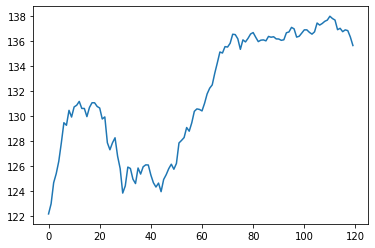

In [101]:
# Perform predictions and render them in a plot
import matplotlib.pyplot as plt

predicted = model.predict(x_val)
plt.plot(predicted)

In [102]:
predicted = predicted.reshape(-1)

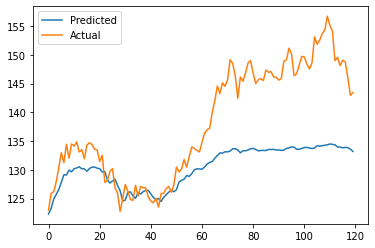

In [96]:
# Render the predictions and the original data
# 25 Epochs
plt.plot(predicted, label="Predicted")
plt.plot(y_val, label="Actual")
plt.legend()

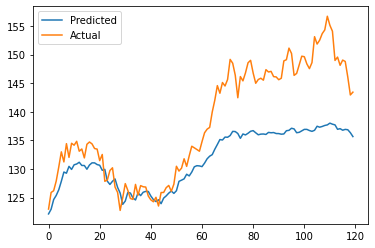

In [103]:
# Render the predictions and the original data
# 50 Epochs
plt.plot(predicted, label="Predicted")
plt.plot(y_val, label="Actual")
plt.legend()

In [105]:
x_train.shape

(1078, 60, 1)

Predict tomorrow's prices based on past 60 days (From Today)

In [108]:
today_past_sixty = data[-60:]
today_past_sixty = today_past_sixty.reshape(1, 60, 1)
model.predict(today_past_sixty)